# Regression Models on Diamonds

#### Created by: Polin Tsenova

Diamonds are one of the most expensive goods on the market and preffered jewellery from many women.This notebook searches for relationship between Diamonds caracteristics and its price. Results of the search are summarized at the end.

### Importing packages


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

### Load Data

In [2]:
diamonds = pd.read_csv('diamonds.csv')

### Initial Data Exploration

About this file
A data frame with 53940 rows and 10 variables:
1. price - price in US dollars (\$326--\$18,823)
2. carat - weight of the diamond (0.2--5.01)
3. cut - quality of the cut (Fair, Good, Very Good, Premium, Ideal)
4. color - diamond colour, from J (worst) to D (best)
5. clarity - a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
6. x - length in mm (0--10.74)
7. y - width in mm (0--58.9)
8. z - depth in mm (0--31.8)
9. depth - total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
10. table - width of top of diamond relative to widest point (43--95)

In [3]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


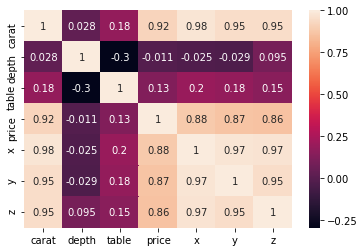

In [6]:
sns.heatmap(diamonds.corr(), annot = True)
plt.show()

### Clean Data

In [7]:
diamonds.dropna()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## Simple Linear Regression on carat and price

In [8]:
#Extracting variables 
simple = diamonds[['carat', 'price']]
simple.head()

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335


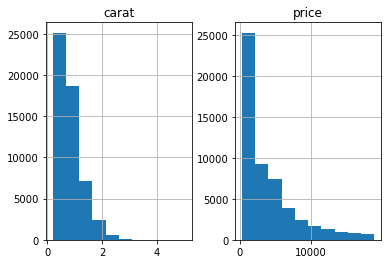

In [9]:
#Displaying the variables frequency distribution
simple.hist()
plt.show()

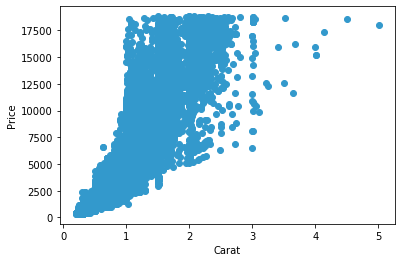

In [10]:
plt.scatter(simple['carat'], simple['price'], color= '#3399CC')
plt.xlabel("Carat")
plt.ylabel("Price")
plt.show()

### Modeling

In [11]:
# Extracting Independat and Dependant variables
X = np.asanyarray(simple['carat']).reshape((-1, 1))
y = np.asanyarray(simple['price'])

In [12]:
# Splitting the Data into Train and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
# Create a model
simple_model = linear_model.LinearRegression()

In [15]:
# Fit the model
simple_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
# The coefficients
print ('Coefficients: ', simple_model.coef_)
print ('Intercept: ', simple_model.intercept_)

Coefficients:  [7745.25658243]
Intercept:  -2248.460057551058


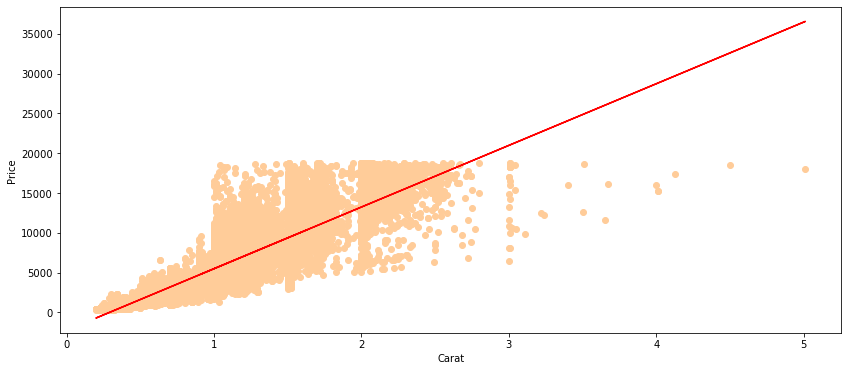

In [17]:
#Visualize the Train regression
plt.figure(figsize=[14,6])
plt.scatter(simple['carat'], simple['price'],  color='#FFCC99')
plt.plot(X_train, simple_model.coef_*X_train + simple_model.intercept_, '-r')
plt.xlabel("Carat")
plt.ylabel("Price")
plt.show()

In [18]:
# Predicting the Test set results
y_predict = simple_model.predict(X_test)

### Evaluating the model

In [19]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_predict - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_predict - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , y_predict))

Mean absolute error: 1002.48
Residual sum of squares (MSE): 2352772.79
R2-score: 0.85


## Multiple Linear Regression

In [20]:
multiple = diamonds[['carat', 'x','y','z','price']]
multiple.head()

,carat,x,y,z,price
0,0.23,3.95,3.98,2.43,326
1,0.21,3.89,3.84,2.31,326
2,0.23,4.05,4.07,2.31,327
3,0.29,4.20,4.23,2.63,334
4,0.31,4.34,4.35,2.75,335


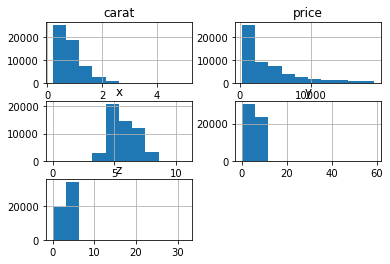

In [21]:
multiple.hist()
plt.show()

### Modeling

In [22]:
# Extracting Independant and Dependant variables
MX = multiple.iloc[:, :-1].values
My = multiple.iloc[:, 4].values

In [23]:
# Splitting the Data into Train and Test set
MX_train, MX_test, My_train, My_test = train_test_split(MX, My, test_size=0.2, random_state=0)

In [24]:
# Create a model
multiple_model = linear_model.LinearRegression()

In [26]:
# Fit the model
multiple_model.fit(MX_train, My_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
# The coefficients
print ('Coefficients: ', multiple_model.coef_)
print ('Intercept: ', multiple_model.intercept_)

Coefficients:  [10143.12303308  -854.15844089   132.05480168  -515.36606437]
Intercept:  1799.7154292568998


In [28]:
# Predicting the Test set results
My_predict = multiple_model.predict(MX_test)

### Evaluating the model

In [29]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(My_predict - My_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((My_predict - My_test) ** 2))
print("R2-score: %.2f" % r2_score(My_test , My_predict))

Mean absolute error: 903.53
Residual sum of squares (MSE): 2260794.36
R2-score: 0.86


## Polynomial Linear Regression

### Modeling

In [30]:
# Extracting Independant and Dependant variables
PX = multiple.iloc[:, :-1].values
Py = multiple.iloc[:, 4].values

In [31]:
# Transform input data
PX_transform = PolynomialFeatures(degree=2, include_bias=False).fit_transform(PX)

In [32]:
# Splitting the Data into Train and Test set
PX_train, PX_test, Py_train, Py_test = train_test_split(PX_transform, Py, test_size=0.2, random_state=0)

In [33]:
# Create a model
polynom_model = linear_model.LinearRegression()

In [34]:
# Fit the model
polynom_model.fit(PX_train, Py_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
# The coefficients
print ('Coefficients: ', polynom_model.coef_)
print ('Intercept: ', polynom_model.intercept_)

Coefficients:  [ -1598.06976065   4458.89014501   -918.64033566 -15230.87995981
  -4533.43805022   1970.53201458   3519.1178835   -4972.18572232
   1392.51461236  -2402.65314547  -2971.12295127   -544.16792531
   6164.3034034      35.91273495]
Intercept:  15730.023803155646


In [36]:
# Predicting the Test set results
Py_predict = polynom_model.predict(PX_test)

### Evaluating the model

In [37]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(Py_predict - Py_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((Py_predict - Py_test) ** 2))
print("R2-score: %.2f" % r2_score(Py_test , Py_predict))

Mean absolute error: 834.63
Residual sum of squares (MSE): 2072225.12
R2-score: 0.87


## Conclusion

This notebook tries to explain the variation of Diamonds price by its characteristics. It explores the data by 3 different regression models - Single, Multiple and Polynomial Regression. The results are summarized in the table below:

| Model| MAE | MSE | R2-score |
| ----- | --- | ------- | ------- |
| SLR | 1002.48 | 2352772.79 | 0.85 |
| MLR | 903.53 | 2260794.36 | 0.86 |
| PLR | 834.63 | 2072225.12 | 0.87 |

From the result table can be concluded that the Polynomial regression model is the best fit and well predicts the price. This is due to the fact that its coeffient of determination(R2-score) is closest to 1 and mean squared error is lowest.